In [1]:
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as pl
import pooch
import os

C:\Users\smithc\AppData\Local\Temp\ipykernel_3420\3142861509.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
df_co2 = pd.read_csv('../data_input/rffsp_co2_emissions.csv')
df_ch4 = pd.read_csv('../data_input/rffsp_ch4_emissions.csv')
df_n2o = pd.read_csv('../data_input/rffsp_n2o_emissions.csv')

In [3]:
ssp_emissions = pooch.retrieve("https://zenodo.org/record/4589756/files/rcmip-emissions-annual-means-v5-1-0.csv",
                              "md5:4044106f55ca65b094670e7577eaf9b3")
df_ssp = pd.read_csv(ssp_emissions)

In [4]:
co2_hist = df_ssp.loc[(df_ssp['Region']=='World')&(df_ssp['Scenario']=='ssp245')&(df_ssp['Variable']=='Emissions|CO2'),'1750':'2020'].interpolate(axis=1).values.squeeze()
ch4_hist = df_ssp.loc[(df_ssp['Region']=='World')&(df_ssp['Scenario']=='ssp245')&(df_ssp['Variable']=='Emissions|CH4'),'1750':'2020'].interpolate(axis=1).values.squeeze()
n2o_hist = df_ssp.loc[(df_ssp['Region']=='World')&(df_ssp['Scenario']=='ssp245')&(df_ssp['Variable']=='Emissions|N2O'),'1750':'2020'].interpolate(axis=1).values.squeeze()

In [5]:
df_co2

,sample,year,value
0,1,2020,11.083171
1,2,2020,11.083171
2,3,2020,11.083171
3,4,2020,11.083171
4,5,2020,11.083171
...,...,...,...
2809995,9996,2300,2.642114
2809996,9997,2300,2.740135
2809997,9998,2300,-5.610808
2809998,9999,2300,2.995989


In [6]:
os.makedirs('../data_processed/emissions_files', exist_ok=True)

In [7]:
for sample in tqdm(range(1, 10001)):
    emissions = np.zeros((551, 3))
    co2 = df_co2[df_co2['sample']==sample].value.values
    ch4 = df_ch4[df_ch4['sample']==sample].value.values
    n2o = df_n2o[df_n2o['sample']==sample].value.values
    emissions[:270, 0] = co2_hist[:-1] / 1000
    emissions[:270, 1] = ch4_hist[:-1]
    emissions[:270, 2] = n2o_hist[:-1] / 1000
    emissions[270:, 0] = co2 * 44.009 / 12.011
    emissions[270:, 1] = ch4
    emissions[270:, 2] = n2o * 44.013 / 28.014
    df_out = pd.DataFrame(emissions, columns=['CO2', 'CH4', 'N2O'], index=range(1750,2301))
    df_out.to_csv('../data_processed/emissions_files/emissions%05d.csv' % sample)

  0%|          | 0/10000 [00:00<?, ?it/s]

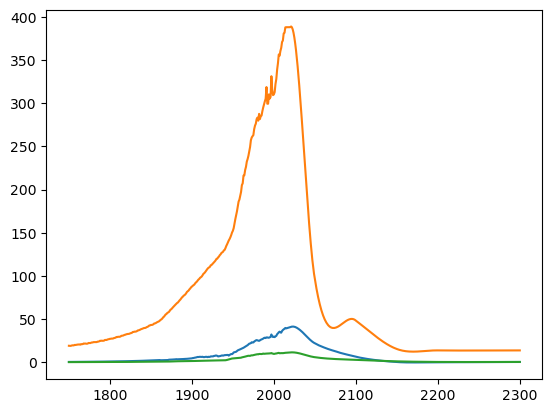

In [8]:
pl.plot(np.arange(1750, 2301), emissions[:,0])
pl.plot(np.arange(1750, 2301), emissions[:,1])
pl.plot(np.arange(1750, 2301), emissions[:,2])